<div align="center" style="background-color:#4CAF50; padding: 20px;">
    <h1 style="color:#0056d;">✈️ Flight Price Prediction ✈️</h1>
</div>


# Pre-Data Analysis Report

## Project: Flight Fare Prediction

### Problem Statement
Flight ticket prices are known to be unpredictable, making it challenging for travelers to plan their journeys. In this project, we aim to leverage machine learning techniques to predict future flight ticket prices. This will assist both airlines in setting competitive prices and travelers in planning their trips effectively.

### Objectives
1. Conduct exploratory data analysis (EDA) to understand the dataset.
2. Clean and preprocess the data for modeling.
3. Select and train predictive models.
4. Evaluate model performance and select the best model for production.


The dataset for this project consists of historical flight ticket prices and relevant features. It includes the following columns:
- `Airline`: The airline operating the flight.
- `Date_of_Journey`: The date of the flight journey.
- `Source`: The departure location.
- `Destination`: The arrival location.
- `Route`: The route taken by the flight.
- `Duration`: The duration of the flight.
- `Total_Stops`: The number of stops during the journey.
- `Additional_Info`: Additional information about the flight.
- `Price`: The target variable, representing the flight ticket price.

### Data Exploration
Before diving into data analysis, we will perform the following data exploration tasks:
- Check for missing values and handle them.
- Identify outliers and determine if they need to be addressed.
- Visualize data distributions and correlations.

### Data Preprocessing
Data preprocessing steps will include:
- Handling missing values by imputation or removal.
- Encoding categorical variables.
- Feature engineering to extract relevant information.
- Splitting the data into training and testing sets.

### Model Selection
We will consider several regression models, including but not limited to:
- Linear Regression
- Random Forest Regressor
- Gradient Boosting Regressor

### Model Evaluation
The performance of each model will be assessed using metrics such as Mean Absolute Error (MAE), Mean Squared Error (MSE), and Root Mean Squared Error (RMSE). The model with the best performance on the test set will be chosen for production.

### Next Steps
The next steps in this project will involve conducting the actual data analysis, feature engineering, model training, and evaluation. We will also create a model comparison report and document any challenges faced during the project.

Let's proceed with the data analysis phase.

---

### Importing labraries

In [196]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set()
import warnings 
warnings.filterwarnings('ignore')

### Importing the dataset

In [197]:
data = pd.read_excel('Data_Train.xlsx')

In [8]:
pd.set_option('display.max_columns',None)

In [9]:
# checking the top five data using head
data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [7]:
#  Checking the non-null vlaues
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


In [12]:
data.shape

(10683, 11)

## Domain Analysis

1. Airline: This column likely contains the name or code of the airline providing the flight service. Airlines are a
            crucial factor in flight selection for passengers.
    <br>

2. Date_of_Journey: This column contains the date when the journey is scheduled to take place. The date of travel is vital 
                    for booking flights and planning itineraries.
    <br>

3. Source: This column likely indicates the departure city  ('Banglore', 'Kolkata', 'Delhi', 'Chennai', 'Mumbai) or airport from where the flight originates. It's important for 
           travelers to know the starting point of their journey.
    <br>

4. Destination: This column likely indicates the arrival city ('New Delhi', 'Banglore', 'Cochin', 'Kolkata', 'Delhi', 'Hyderabad') or airport where the flight is heading. It's crucial for 
                passengers to know the final destination.
    <br>

5. Route: This column may provide information about the flight path, including any layovers or stops along the way. 
          Passengers may consider the route when choosing a flight.
    <br>

6. Dep_Time: This column indicates the departure time of the flight. Knowing the departure time is essential for travelers 
             to plan their schedules and reach the airport on time.
    <br>

7. Arrival_Time: This column shows the estimated arrival time at the destination. Passengers use this information to plan 
                 their transportation from the airport to their final destination.
    <br>

8. Duration: This column likely represents the duration of the flight, i.e., the time it takes to travel from the source to
             the destination. This information helps passengers choose flights that fit their time constraints.<br>

9. Total_Stops: This column may specify the number of stops or layovers during the journey. Non-stop flights are generally 
                preferred for their shorter travel times.
 <br>

10. Additional_Info: This column could contain supplementary information about the flight, such as special services, 
                     conditions, or remarks. It can provide additional context for travelers.
    <br>

11. Price: This column most likely displays the ticket price for the flight. Pricing is a significant factor for travelers
    when making their booking decisions.

## Exploratary Data Analysis

### Univariate analysis

In [198]:
import sweetviz as sv
report = sv.analyze(data)
report.show_html("data1.html")  

                                             |                                             | [  0%]   00:00 ->…

Report data1.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


## Insights

- Airline Preference: Approximately 36% of passengers displayed a preference for Jet Airways, while Jet Airways Business received the least preference among travelers.

- Date of Travel: The data suggests that the majority of people tend to travel during the months of May and June.

- Source Location: Delhi emerges as the most frequented departure point for travelers, whereas Chennai sees the lowest number of departures.

- Destination: The city of Cochin ranks highest in terms of destination preference, with an average selection rate of 43%, while Kolkata is the least preferred destination, with a mere 4% selection rate.

- Preferred Route: The route from Delhi to Bombay (Mumbai) to Cochin (DEL-BOM-COK) stands out as the most favored route, chosen by an average of 23% of travelers. Routes with 4 or 5 stops are the least preferred.

- Flight Duration: Passengers typically favor flights with the shortest duration.

- Total Stops: Only 33% of flights offer non-stop travel options, with the majority providing one-stop connections around 51%. There is only one flight with 4 stops.

- Price Range: The majority of flight prices fall below 20,000 units of currency, while some flights are priced above 40,000 units.

## Bivariate Analysis

### Airline V/s Price

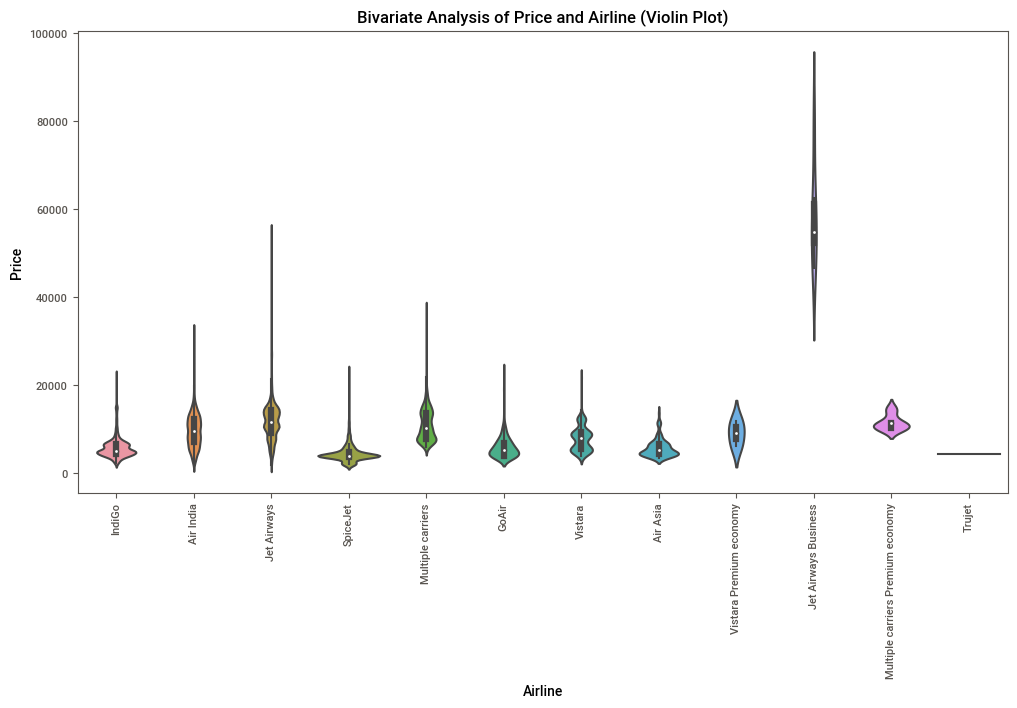

In [7]:
# Create a violin plot to analyze the relationship between 'Price' and 'Airline'
plt.figure(figsize=(12, 6))
sns.violinplot(x='Airline', y='Price', data=data)
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.xlabel('Airline')
plt.ylabel('Price')
plt.title('Bivariate Analysis of Price and Airline (Violin Plot)')
plt.show()


###  Insights 

- Jet airways has slightly higher price in both the domain.
- spicejet and indigo has a bit lowe price compare to other flights.

### Source V/s Price

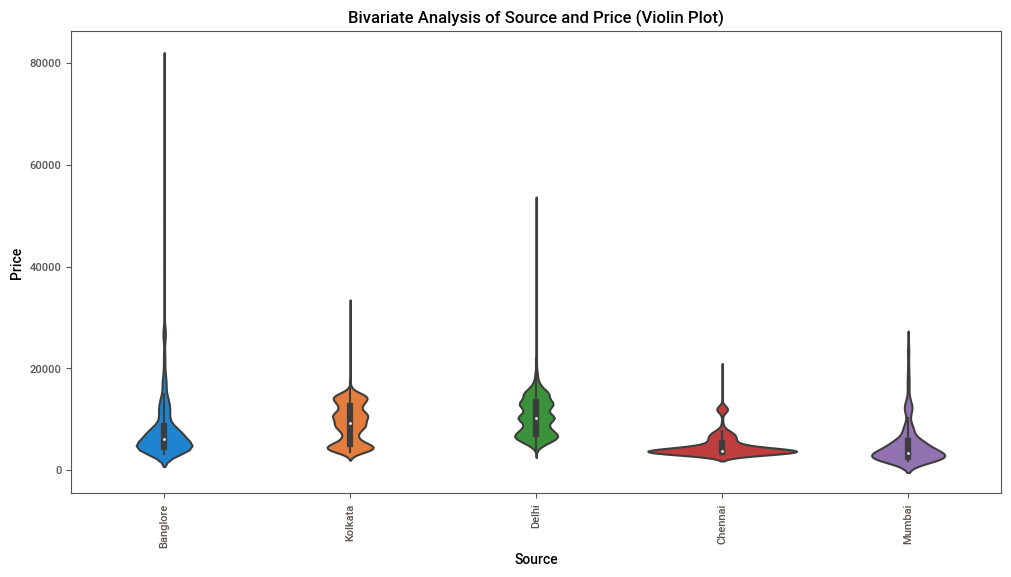

In [9]:
plt.figure(figsize=(12, 6))
sns.violinplot(x='Source', y='Price', data=data)
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.xlabel('Source')
plt.ylabel('Price')
plt.title('Bivariate Analysis of Source and Price (Violin Plot)')
plt.show()


### Insights
- Flight source to chennai has slightly lowe price 

### Destination V/s Price

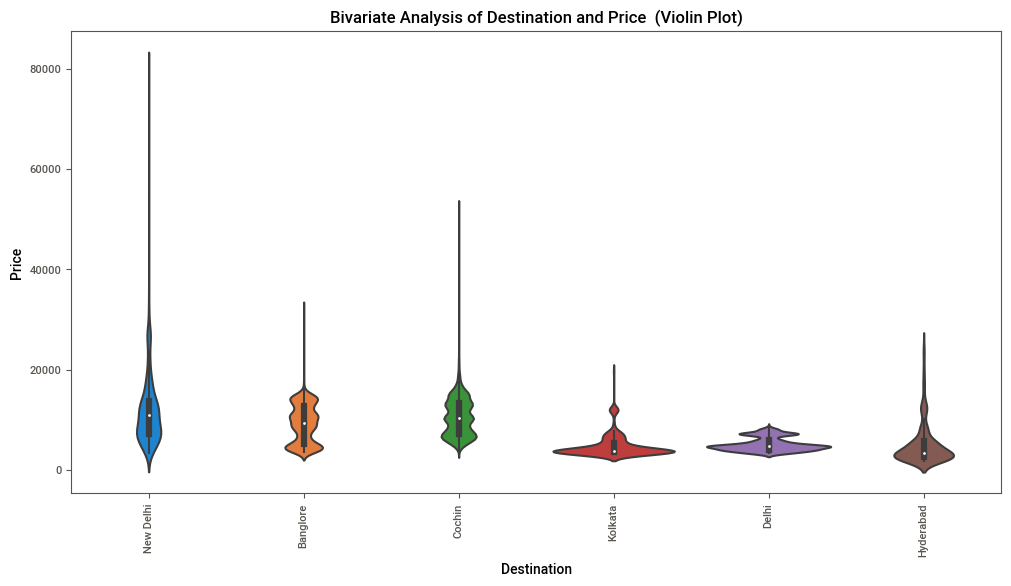

In [10]:
plt.figure(figsize=(12, 6))
sns.violinplot(x='Destination', y='Price', data=data)
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.xlabel('Destination')
plt.ylabel('Price')
plt.title('Bivariate Analysis of Destination and Price  (Violin Plot)')
plt.show()


### Insights 
- flight destination kolkata and delhi has slightly lowe prices but

### Rute V/s Price

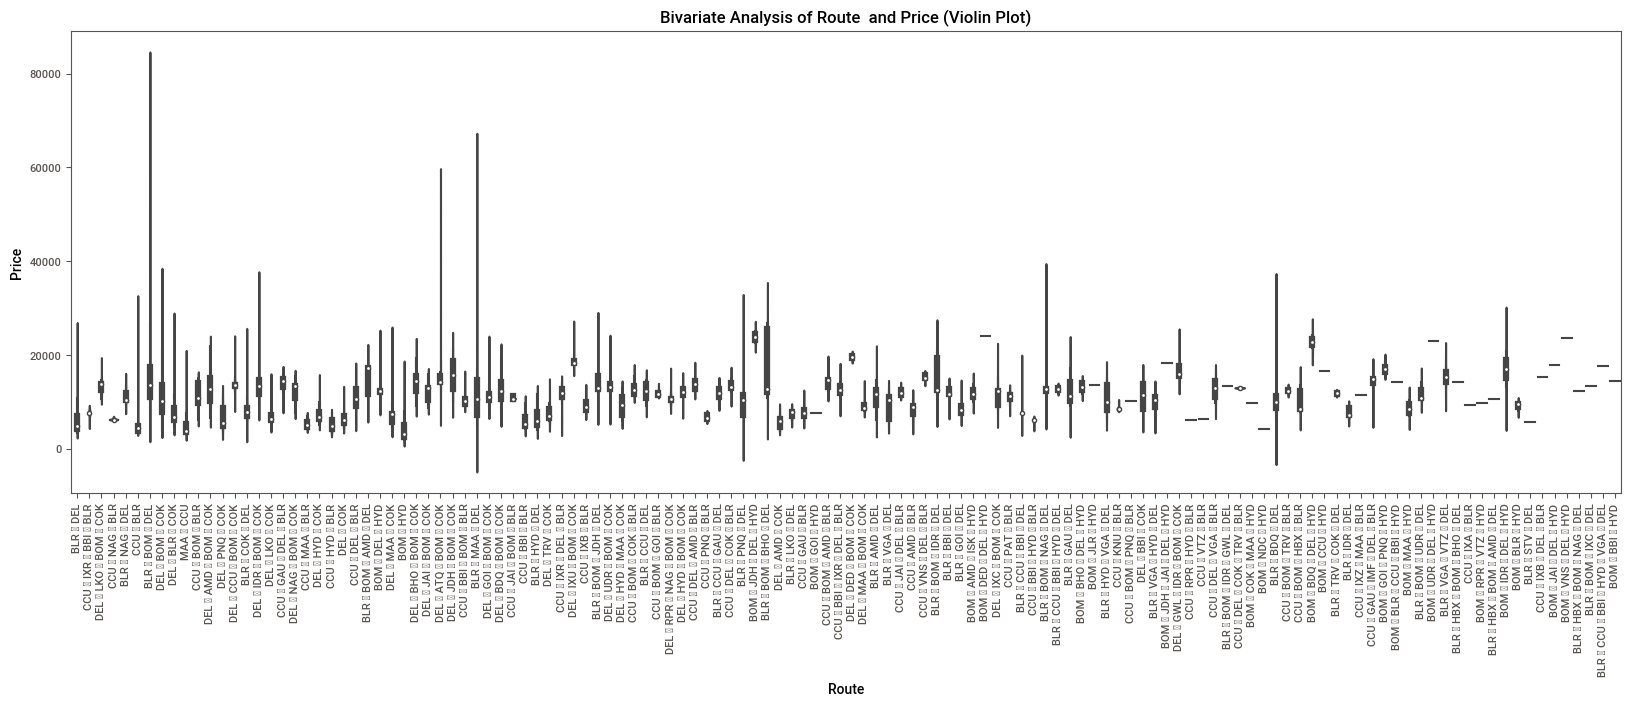

In [11]:
plt.figure(figsize=(20, 6))
sns.violinplot(x='Route', y='Price', data=data)
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.xlabel('Route')
plt.ylabel('Price')
plt.title('Bivariate Analysis of Route  and Price (Violin Plot)')
plt.show()

### Insights

Avg pice for all the roputes are below 40000 but sone of the routes are higher in price like (BLR-BOM-DEL).

### Dep-Time V/s Price

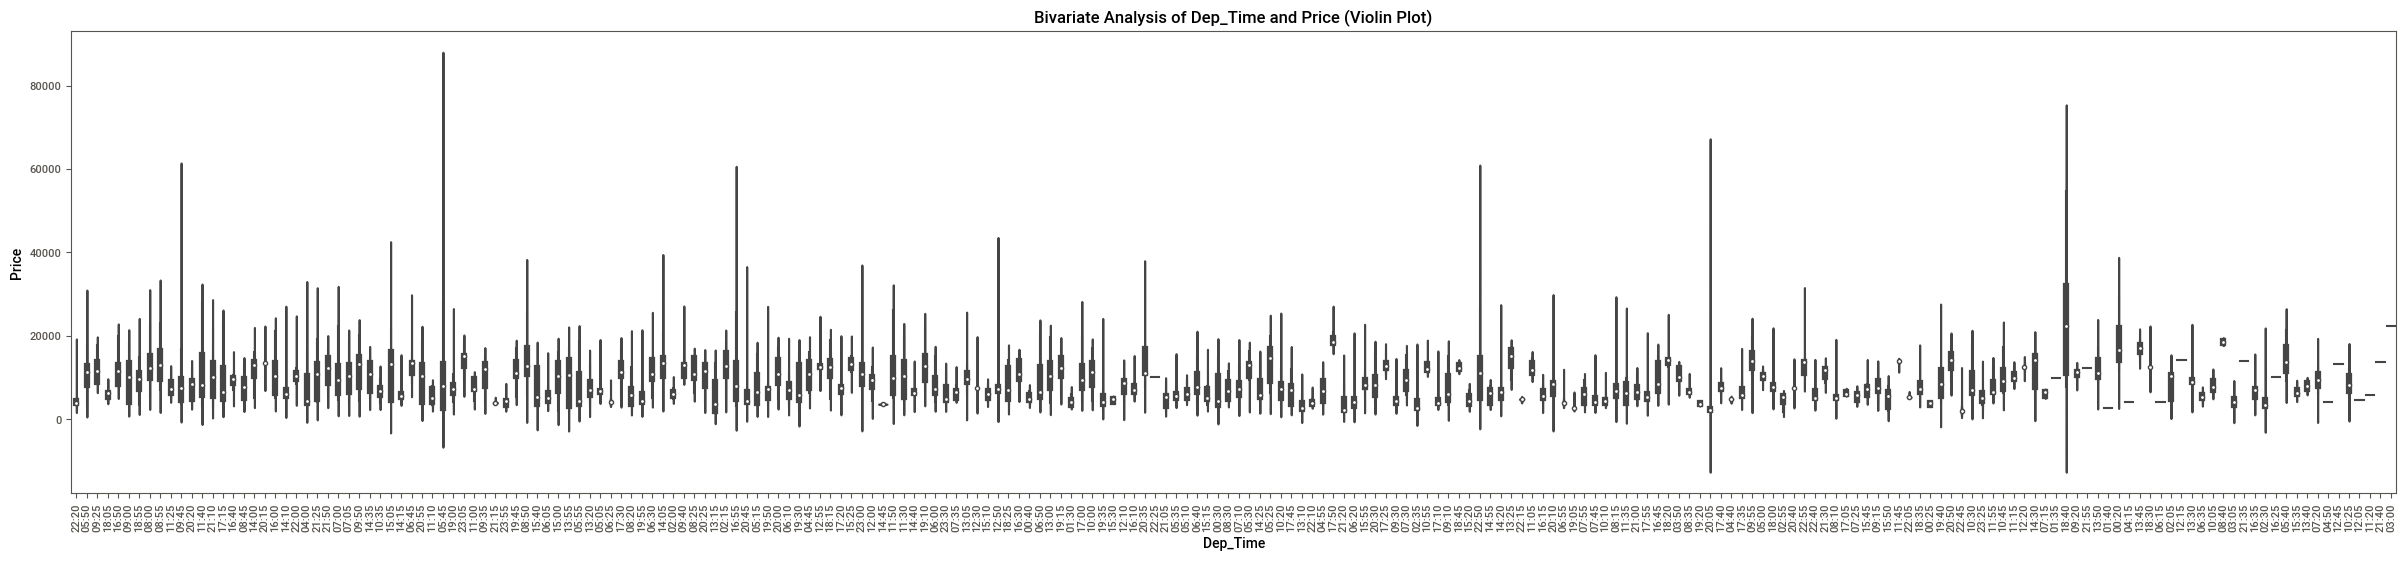

In [13]:
plt.figure(figsize=(30, 6))
sns.violinplot(x='Dep_Time', y='Price', data=data)
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.xlabel('Dep_Time')
plt.ylabel('Price')
plt.title('Bivariate Analysis of Dep_Time and Price (Violin Plot)')
plt.show()

### Insights 

Dep-Time seems to be not much affecting the price but in some cases prices are too high for morning and evening flights 

### Total_Stops V/s Price

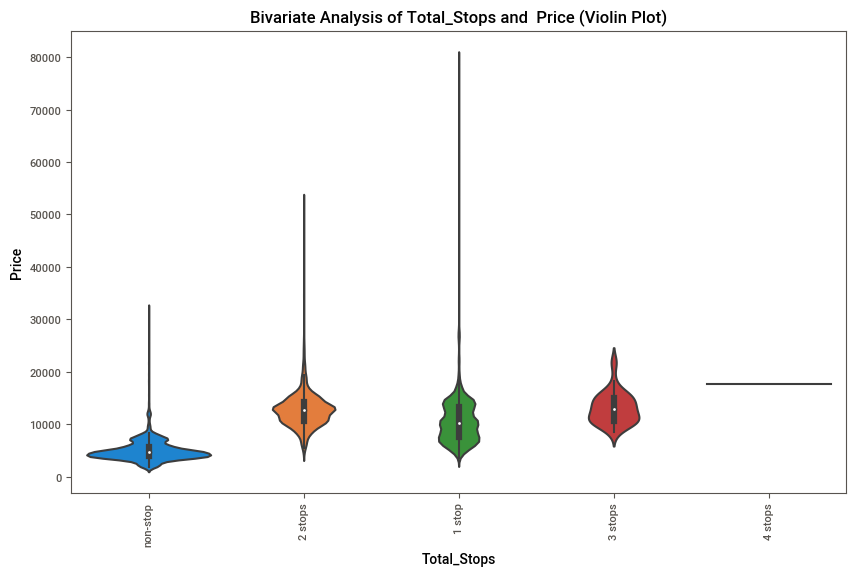

In [15]:
plt.figure(figsize=(10, 6))
sns.violinplot(x='Total_Stops', y='Price', data=data)
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.xlabel('Total_Stops')
plt.ylabel('Price')
plt.title('Bivariate Analysis of Total_Stops and  Price (Violin Plot)')
plt.show()

### Insights 


Multiple-flight itineraries with one stop tend to have higher price points, often in the vicinity of 80,000 units of 
currency. 

In contrast, non-stop flights typically fall within the avarage price range of below 10,000 to maximum upto 40,000 units of currency.

### Airline and Source

In [33]:
city_counts = data['Source'].value_counts()

# Display the number of flights for each city
print(city_counts)


Delhi       4537
Kolkata     2871
Banglore    2197
Mumbai       697
Chennai      381
Name: Source, dtype: int64


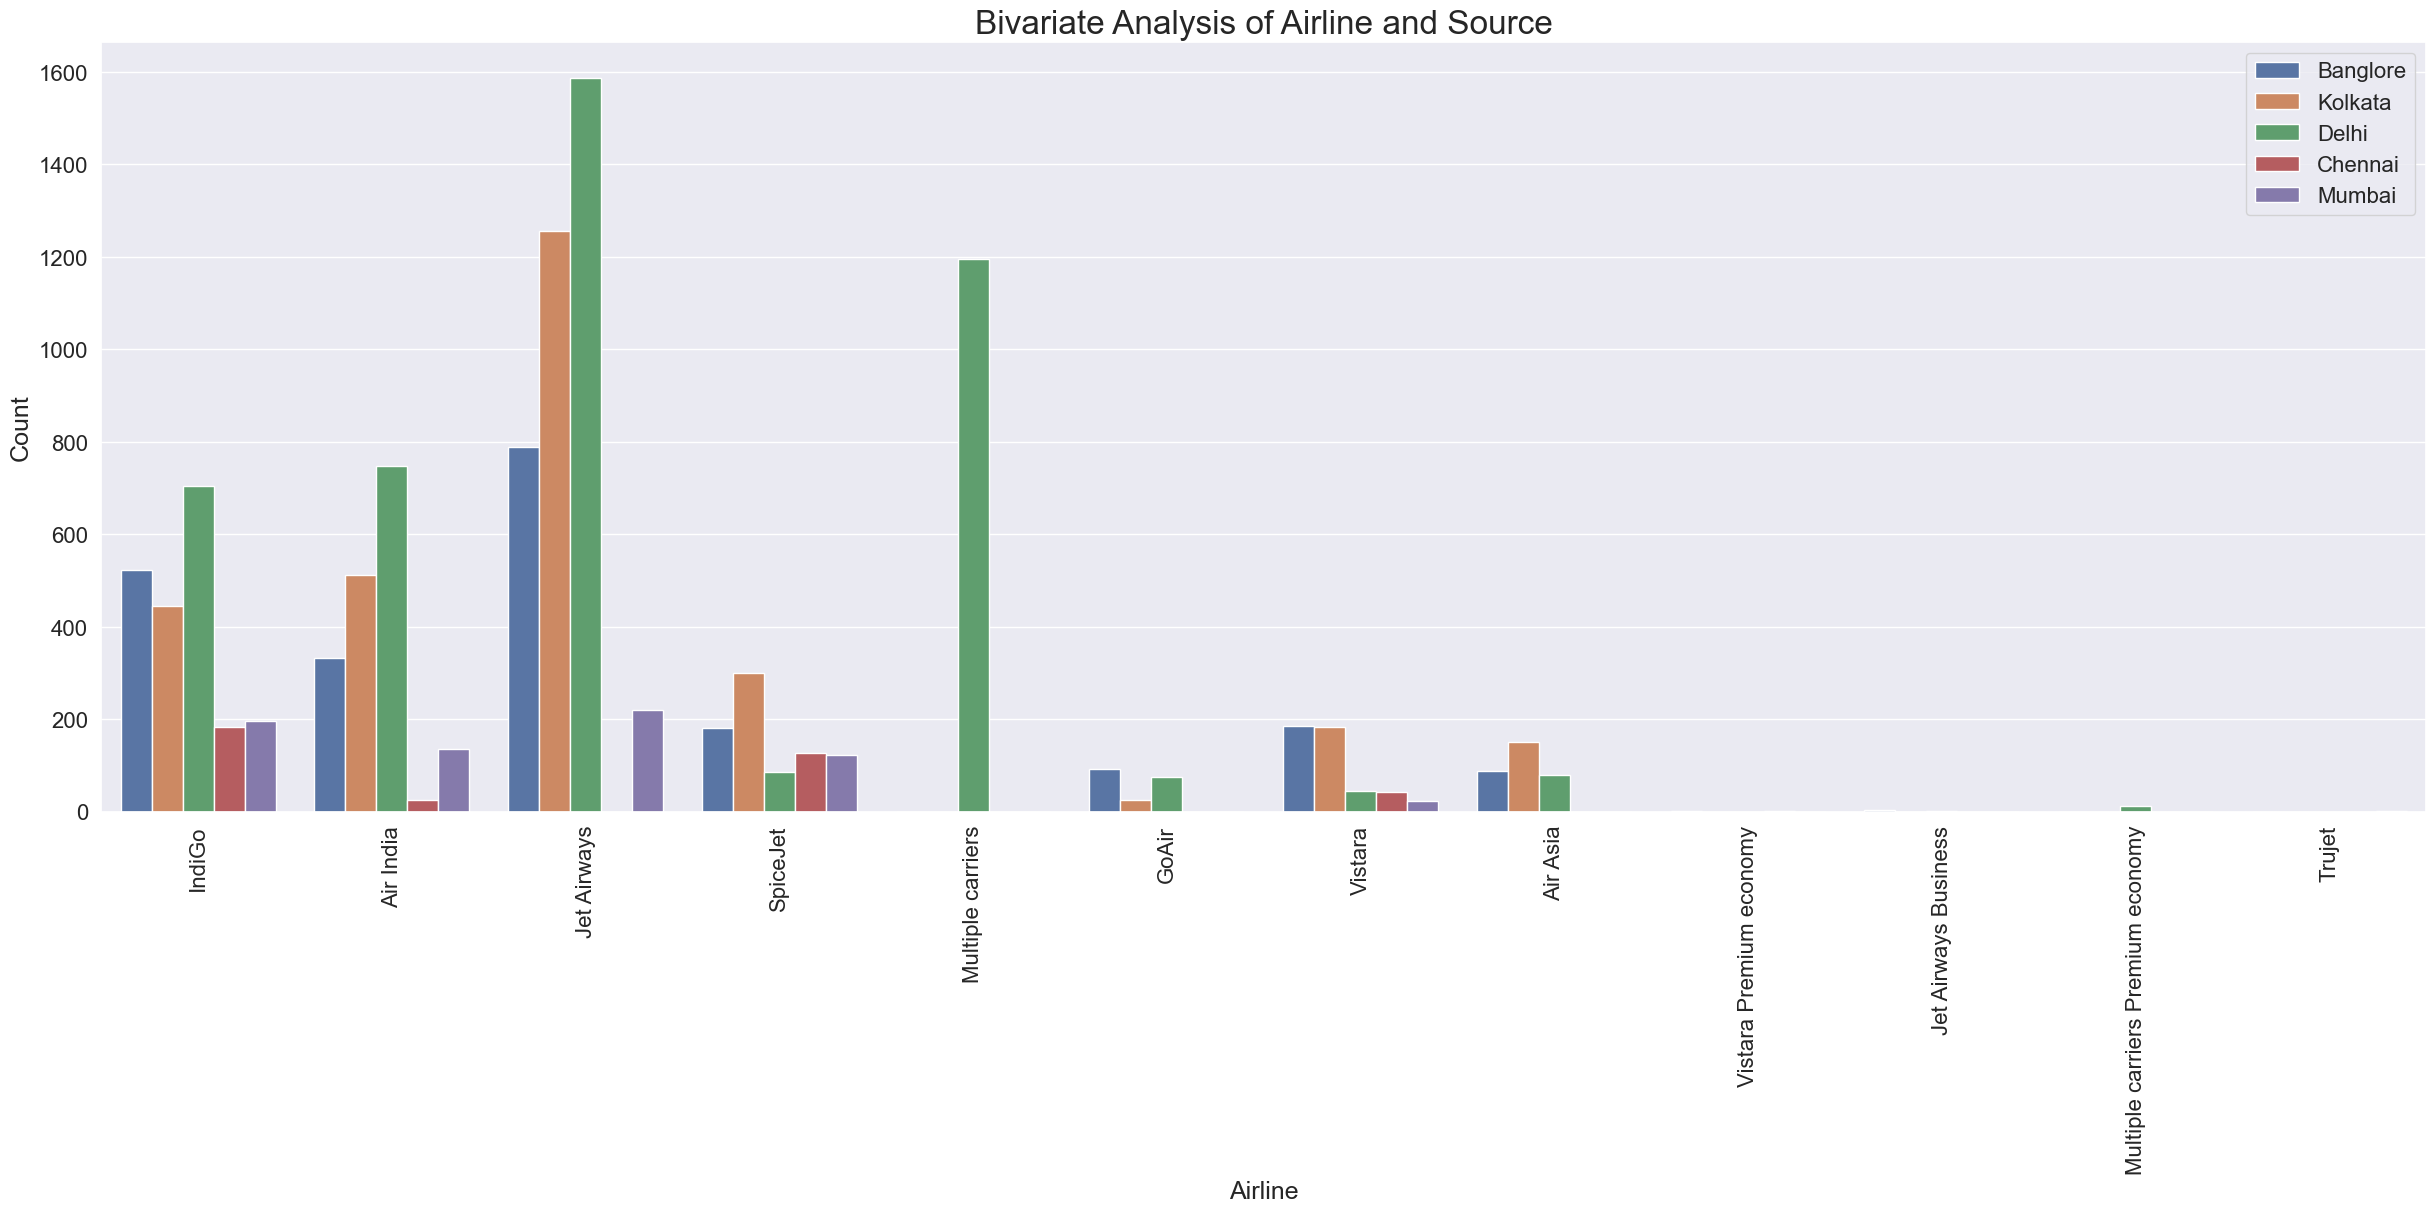

In [30]:
plt.figure(figsize=(30, 10), facecolor='white')

sns.set(font_scale=2)  # Set the font scale to increase text size

sns.countplot(x=data['Airline'], hue=data['Source'])
plt.title('Bivariate Analysis of Airline and Source', fontsize=24)  # Increase title font size
plt.xlabel('Airline', fontsize=18)  # Increase x-axis label font size
plt.ylabel('Count', fontsize=18)
# Increase y-axis label font size
plt.xticks(fontsize=16)  # Increase x-axis tick label font size
plt.yticks(fontsize=16)  # Increase y-axis tick label font size
plt.legend(fontsize=16)  # Increase legend font size

plt.show()


### Insights

jet airways provide highest number of flights to Delhi which is aproximetly 1600

Delhi ranks as the city with the highest number of flight offerings, exceeding 45000 flights.

Additionally, Indigo and air india stands out for providing flights for all the sources 

Multiple carriers provide flights only for Delhi 






### Airline V/s Destination

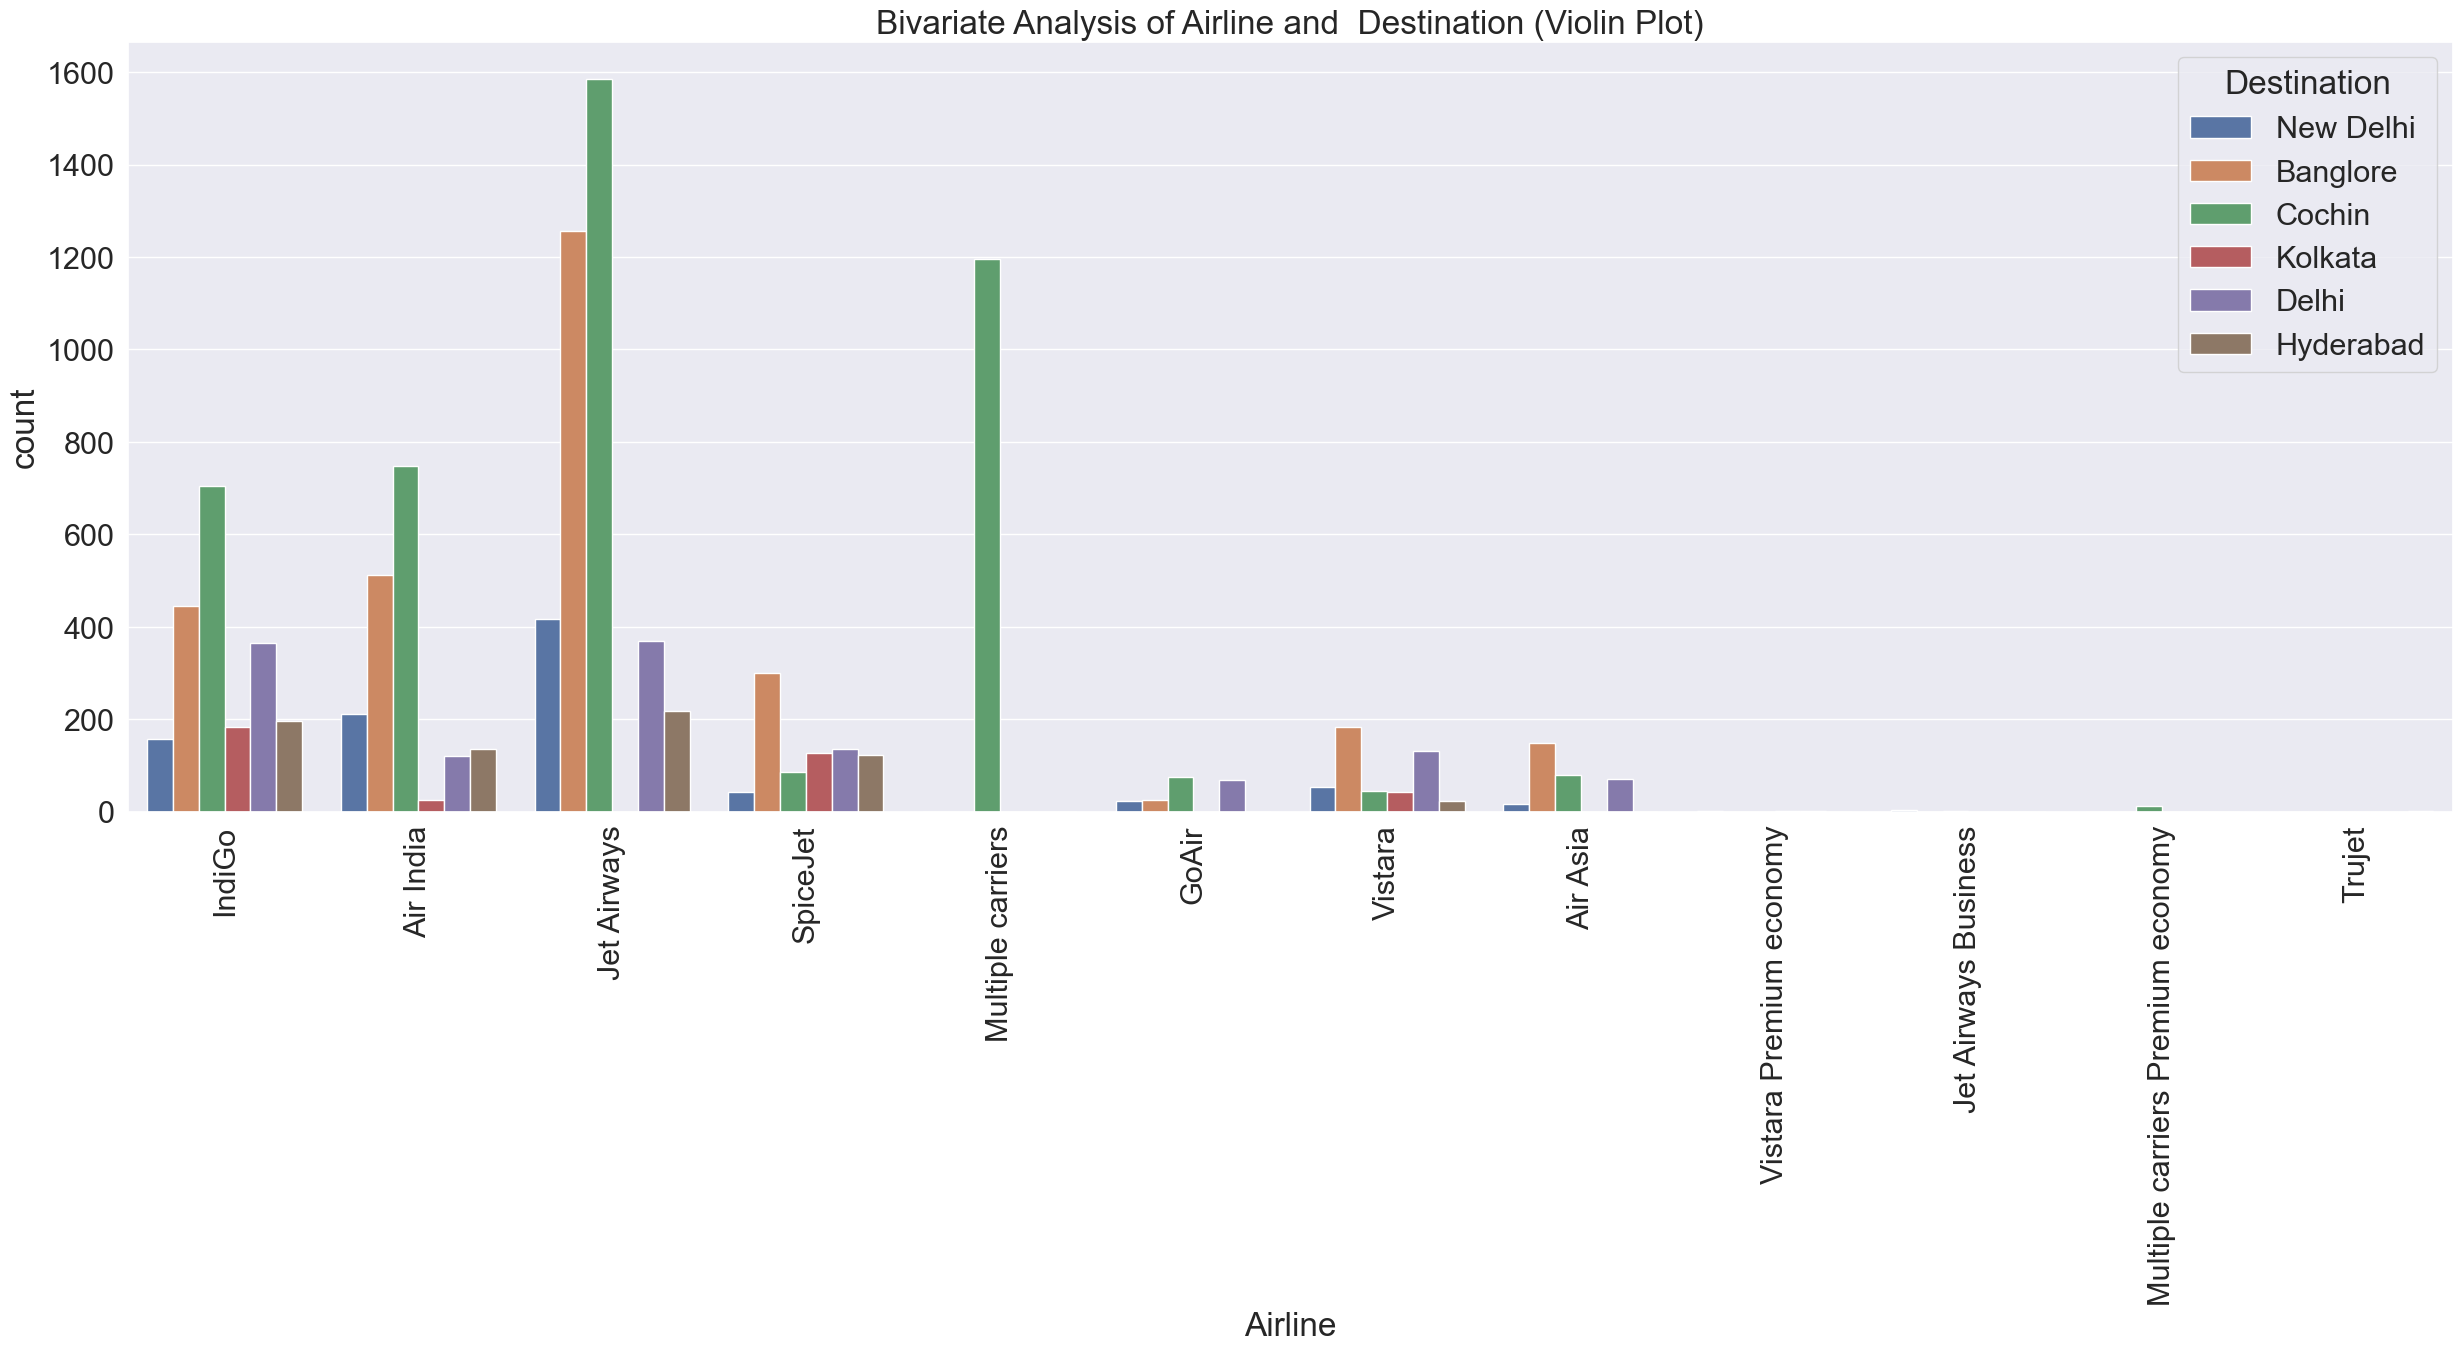

In [35]:
plt.figure(figsize=(30,10), facecolor='white')#canvas size

sns.countplot(x=data.Airline,hue=data.Destination)
plt.title('Bivariate Analysis of Airline and  Destination (Violin Plot)')
plt.xticks(rotation=90)

plt.show()

### Insights

The majority of flight services offer Cochin as a destination, with several multiple carriers also catering exclusively to this particular city.

Conversely, GoAir flights to Cochin, New Delhi, Delhi, and Bangalore are notably less frequently available among the flight offerings.


### Airlie V/s Total_Stops

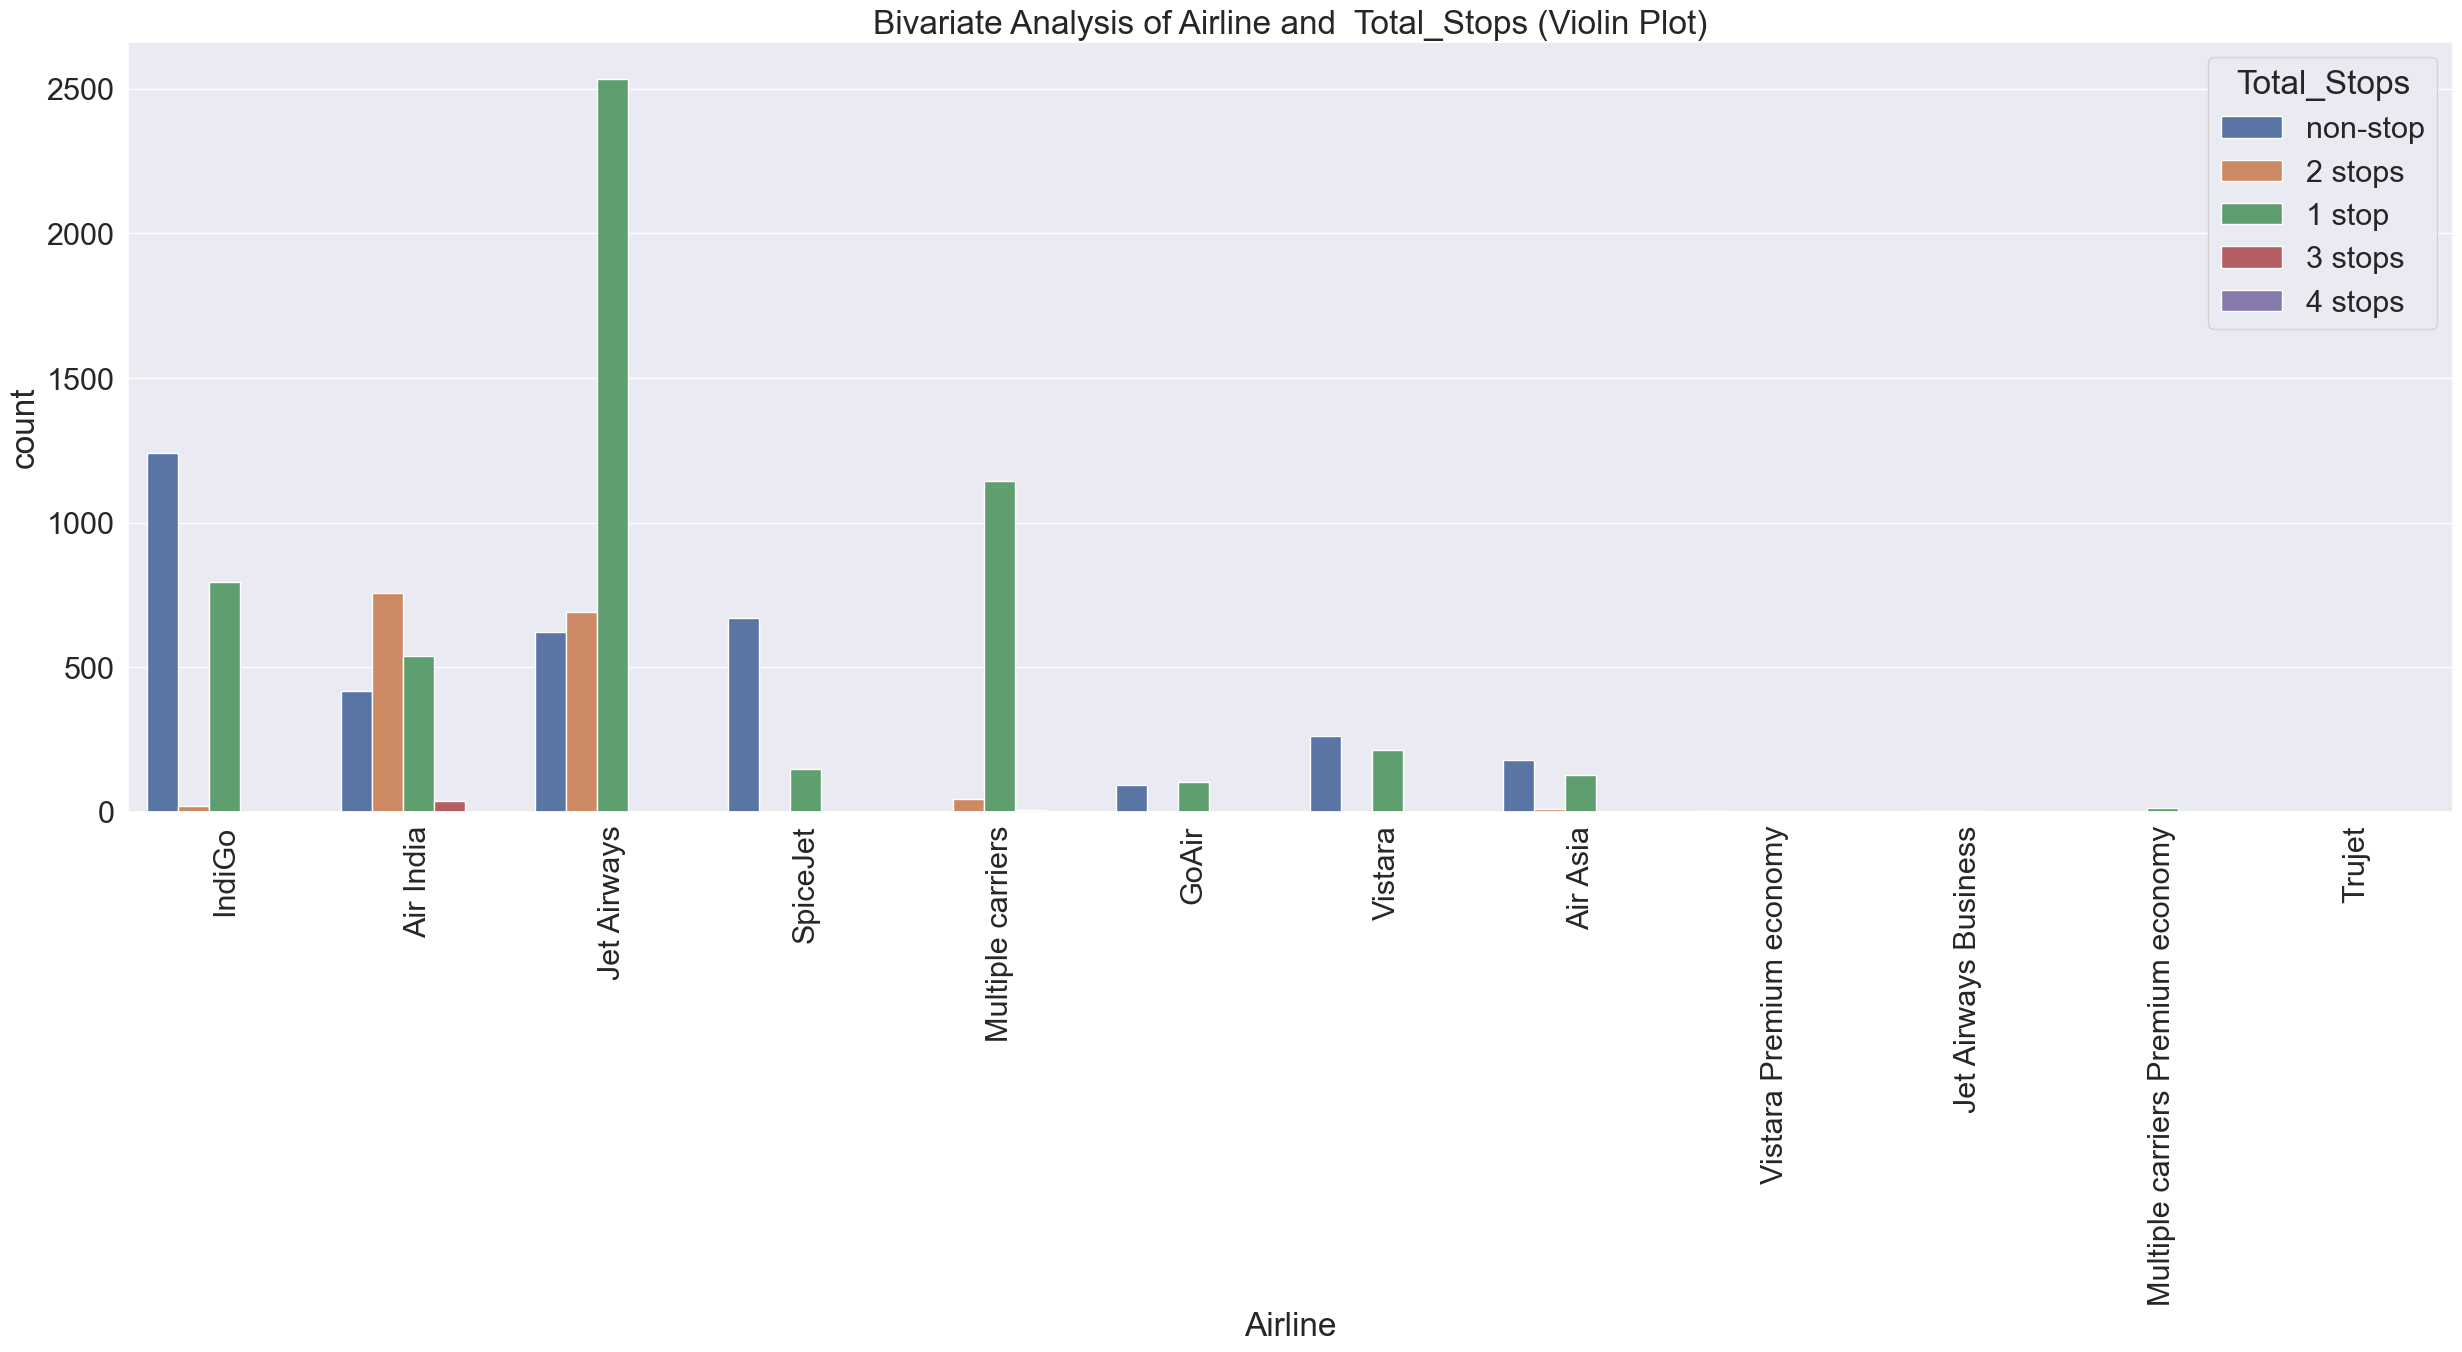

In [36]:
plt.figure(figsize=(30,10), facecolor='white')#canvas size

sns.countplot(x=data.Airline,hue=data.Total_Stops)
plt.title('Bivariate Analysis of Airline and  Total_Stops (Violin Plot)')
plt.xticks(rotation=90)
plt.show()

### Insights 

The majority of flight services are offered by Jet Airways and Indigo, both predominantly offering one-stop flights.

Indigo stands out as the primary provider of non-stop flights, while Go Air is the least frequently selected option, 
offering both one-stop and non-stop flights infrequently.

### Airline V/s Addtional_Info

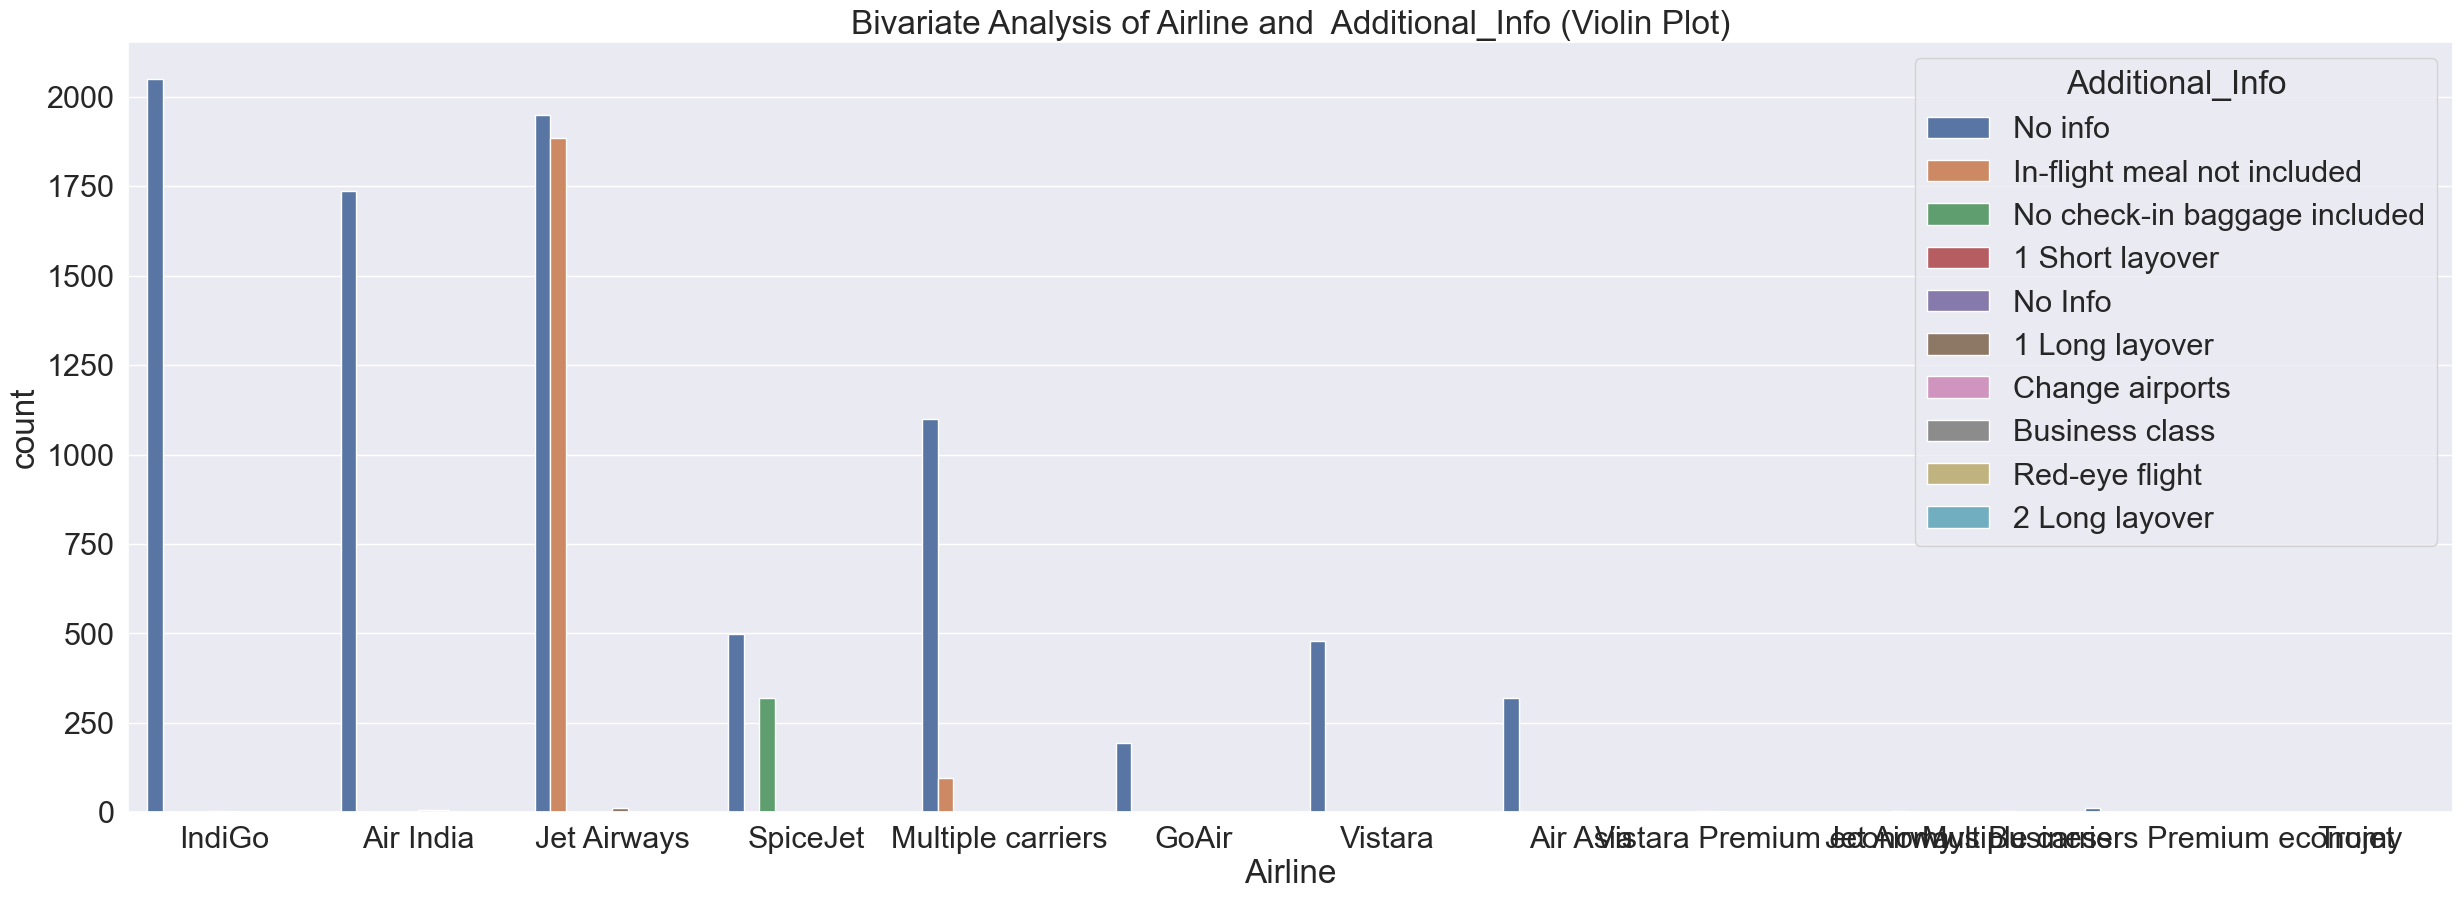

In [38]:
plt.figure(figsize=(30,10), facecolor='white')#canvas size

sns.countplot(x=data.Airline,hue=data.Additional_Info)
plt.title('Bivariate Analysis of Airline and  Additional_Info (Violin Plot)')

plt.show()

### Insights 
The majority of flight services are offered by Jet Airways and Indigo, with a single layover being the common configuration for Indigo flights.

Indigo stands out as the airline with the highest frequency of non-stop flight offerings. In contrast, Go Air is comparatively infrequent in providing both one-stop and non-stop flight options.

In [8]:
data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


## Data preprocessing 

In [73]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


In [74]:
data.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

In [75]:
data.dropna(inplace=True)

In [76]:
data.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
dtype: int64

##### Data set has no missing values 

In [77]:
data.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops',
       'Additional_Info', 'Price'],
      dtype='object')

#### Converting the date time format
EDA
From description we can see that Date_of_Journey is a object data type,
Therefore, we have to convert this datatype into timestamp so as to use this column properly for prediction

For this we require pandas to_datetime to convert object data type to datetime dtype.

.dt.day method will extract only day of that date
.dt.month method will extract only month of that date

In [78]:
data["Journey_day"] = pd.to_datetime(data.Date_of_Journey, format="%d/%m/%Y").dt.day

data["Journey_month"] = pd.to_datetime(data.Date_of_Journey, format="%d/%m/%Y").dt.month

#we dont need date of journey so we will remove it 

data.drop(["Date_of_Journey"], axis = 1, inplace = True)

In [79]:
data.head()

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,1,5
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,9,6
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,12,5
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,1,3


In [80]:
# Departure time is when a plane leaves the gate. 
# Similar to Date_of_Journey we can extract values from Dep_Time

# Extracting Hours
data["Dep_hour"] = pd.to_datetime(data["Dep_Time"]).dt.hour

# Extracting Minutes
data["Dep_min"] = pd.to_datetime(data["Dep_Time"]).dt.minute
# Now we can drop Dep_Time as it is of no use
data.drop(["Dep_Time"], axis = 1, inplace = True)

In [81]:
data.head()

,Airline,Source,Destination,Route,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Dep_hour,Dep_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3,22,20
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,13:15,7h 25m,2 stops,No info,7662,1,5,5,50
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,04:25 10 Jun,19h,2 stops,No info,13882,9,6,9,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,23:30,5h 25m,1 stop,No info,6218,12,5,18,5
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,21:35,4h 45m,1 stop,No info,13302,1,3,16,50


In [82]:
data["Arrival_hour"] = pd.to_datetime(data["Arrival_Time"]).dt.hour

# Extracting Minutes
data["Arrival_min"] = pd.to_datetime(data["Arrival_Time"]).dt.minute
# Now we can drop Dep_Time as it is of no use
data.drop(["Arrival_Time"], axis = 1, inplace = True)

In [83]:
data.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,22,20,1,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,1,5,5,50,13,15
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h,2 stops,No info,13882,9,6,9,25,4,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1 stop,No info,6218,12,5,18,5,23,30
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1 stop,No info,13302,1,3,16,50,21,35


In [84]:
#Duration is nothing but difference between departure time and arrival time 

# Assigning and converting Duration column into list
duration = list(data["Duration"])

for i in range(len(duration)):
    if len(duration[i].split()) != 2:    # Check if duration contains only hour or mins
        if "h" in duration[i]:
            duration[i] = duration[i].strip() + " 0m"   # Adds 0 minute
        else:
            duration[i] = "0h " + duration[i]           # Adds 0 hour

duration_hours = []
duration_mins = []
for i in range(len(duration)):
    duration_hours.append(int(duration[i].split(sep = "h")[0]))    # Extract hours from duration
    duration_mins.append(int(duration[i].split(sep = "m")[0].split()[-1]))   # Extracts only minutes from duration

In [85]:
# Adding duration_hours and duration_mins list to train_data dataframe

data["Duration_hours"] = duration_hours
data["Duration_mins"] = duration_mins

In [86]:
data.drop(['Duration'],inplace=True,axis=1)

In [87]:
data.head()

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hours,Duration_mins
0,IndiGo,Banglore,New Delhi,BLR → DEL,non-stop,No info,3897,24,3,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2 stops,No info,7662,1,5,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2 stops,No info,13882,9,6,9,25,4,25,19,0
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,1 stop,No info,6218,12,5,18,5,23,30,5,25
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,1 stop,No info,13302,1,3,16,50,21,35,4,45


# Encodin

In [88]:
data.columns

Index(['Airline', 'Source', 'Destination', 'Route', 'Total_Stops',
       'Additional_Info', 'Price', 'Journey_day', 'Journey_month', 'Dep_hour',
       'Dep_min', 'Arrival_hour', 'Arrival_min', 'Duration_hours',
       'Duration_mins'],
      dtype='object')

### Airline

In [89]:
data["Airline"].value_counts()

Jet Airways                          3849
IndiGo                               2053
Air India                            1751
Multiple carriers                    1196
SpiceJet                              818
Vistara                               479
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: Airline, dtype: int64

In [90]:
# we are useing the ordinal encoding this data does not show any orders
Airline = data[["Airline"]]

Airline = pd.get_dummies(Airline, drop_first= True)

Airline.head()

,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,Airline_Vistara Premium economy
0,0,0,1,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0,0
3,0,0,1,0,0,0,0,0,0,0,0
4,0,0,1,0,0,0,0,0,0,0,0


### Source

In [91]:
data['Source'].value_counts()

Delhi       4536
Kolkata     2871
Banglore    2197
Mumbai       697
Chennai      381
Name: Source, dtype: int64

In [92]:
# As Source is Nominal Categorical data we will perform OneHotEncoding

Source = data[["Source"]]

Source = pd.get_dummies(Source, drop_first= True)

Source.head()

,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai
0,0,0,0,0
1,0,0,1,0
2,0,1,0,0
3,0,0,1,0
4,0,0,0,0


### Destination

In [93]:
data['Destination'].value_counts()

Cochin       4536
Banglore     2871
Delhi        1265
New Delhi     932
Hyderabad     697
Kolkata       381
Name: Destination, dtype: int64

In [94]:
# As Destination is Nominal Categorical data we will perform OneHotEncoding

Destination = data[["Destination"]]

Destination = pd.get_dummies(Destination, drop_first = True)

Destination.head()

,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,0,0,0,0,1
1,0,0,0,0,0
2,1,0,0,0,0
3,0,0,0,0,0
4,0,0,0,0,1


In [95]:
##merging all the nominal columns 

data_train = pd.concat([data, Airline, Source, Destination], axis = 1)

In [96]:
data_train.head()

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hours,Duration_mins,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,IndiGo,Banglore,New Delhi,BLR → DEL,non-stop,No info,3897,24,3,22,20,1,10,2,50,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2 stops,No info,7662,1,5,5,50,13,15,7,25,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2 stops,No info,13882,9,6,9,25,4,25,19,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,1 stop,No info,6218,12,5,18,5,23,30,5,25,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,1 stop,No info,13302,1,3,16,50,21,35,4,45,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [97]:
#droping privious columns 
data_train.drop(["Airline", "Source", "Destination"], axis = 1, inplace = True)

In [98]:
data_train.head()

,Route,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hours,Duration_mins,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,BLR → DEL,non-stop,No info,3897,24,3,22,20,1,10,2,50,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,CCU → IXR → BBI → BLR,2 stops,No info,7662,1,5,5,50,13,15,7,25,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2,DEL → LKO → BOM → COK,2 stops,No info,13882,9,6,9,25,4,25,19,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0
3,CCU → NAG → BLR,1 stop,No info,6218,12,5,18,5,23,30,5,25,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
4,BLR → NAG → DEL,1 stop,No info,13302,1,3,16,50,21,35,4,45,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


### Total_Stops

In [99]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10682 entries, 0 to 10682
Data columns (total 32 columns):
 #   Column                                     Non-Null Count  Dtype 
---  ------                                     --------------  ----- 
 0   Route                                      10682 non-null  object
 1   Total_Stops                                10682 non-null  object
 2   Additional_Info                            10682 non-null  object
 3   Price                                      10682 non-null  int64 
 4   Journey_day                                10682 non-null  int64 
 5   Journey_month                              10682 non-null  int64 
 6   Dep_hour                                   10682 non-null  int64 
 7   Dep_min                                    10682 non-null  int64 
 8   Arrival_hour                               10682 non-null  int64 
 9   Arrival_min                                10682 non-null  int64 
 10  Duration_hours                    

In [102]:
data_train.Total_Stops.value_counts()

1 stop      5625
non-stop    3491
2 stops     1520
3 stops       45
4 stops        1
Name: Total_Stops, dtype: int64

In [104]:
#using manual incoding 
data_train.replace({"non-stop": 0, "1 stop": 1, "2 stops": 2, "3 stops": 3, "4 stops": 4}, inplace = True)
data_train.head()

,Route,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hours,Duration_mins,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,BLR → DEL,0,No info,3897,24,3,22,20,1,10,2,50,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,CCU → IXR → BBI → BLR,2,No info,7662,1,5,5,50,13,15,7,25,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2,DEL → LKO → BOM → COK,2,No info,13882,9,6,9,25,4,25,19,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0
3,CCU → NAG → BLR,1,No info,6218,12,5,18,5,23,30,5,25,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
4,BLR → NAG → DEL,1,No info,13302,1,3,16,50,21,35,4,45,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


### Dropping unwanted columns

In [105]:
#  These are Unwanted columns that why im removing it
#  Route and Total_Stops providing a same details
#  Additional_Info has too much missing information
data_train.drop(['Route','Additional_Info'],axis=1,inplace=True)

In [108]:
data_train.head(3)

,Total_Stops,Price,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hours,Duration_mins,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,0,3897,24,3,22,20,1,10,2,50,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,2,7662,1,5,5,50,13,15,7,25,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2,2,13882,9,6,9,25,4,25,19,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0


In [109]:
data_train.shape

(10682, 30)

## Test set

In [114]:
data_test = pd.read_excel("Test_set.xlsx")

In [115]:
data_test.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info
2,Jet Airways,21/05/2019,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included
3,Multiple carriers,21/05/2019,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13h,1 stop,No info
4,Air Asia,24/06/2019,Banglore,Delhi,BLR → DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info


In [117]:
data.shape

(10682, 15)

In [120]:
# Preprocessing

print("Test data Info")
print("-"*75)
print(data_test.info())

print()
print()

print("Null values :")
print("-"*75)
data_test.dropna(inplace=True)
print(data_test.isnull().sum())

# EDA

# Date_of_Journey
data_test["Journey_day"] = pd.to_datetime(data_test.Date_of_Journey, format="%d/%m/%Y").dt.day
data_test["Journey_month"] = pd.to_datetime(data_test["Date_of_Journey"], format="%d/%m/%Y").dt.month
data_test.drop(["Date_of_Journey"], axis=1, inplace=True)

# Dep_Time
data_test["Dep_hour"] = pd.to_datetime(data_test["Dep_Time"]).dt.hour
data_test["Dep_min"] = pd.to_datetime(data_test["Dep_Time"]).dt.minute
data_test.drop(["Dep_Time"], axis=1, inplace=True)

# Arrival_Time
data_test["Arrival_hour"] = pd.to_datetime(data_test.Arrival_Time).dt.hour
data_test["Arrival_min"] = pd.to_datetime(data_test.Arrival_Time).dt.minute
data_test.drop(["Arrival_Time"], axis=1, inplace=True)

# Duration
duration = list(data_test["Duration"])

for i in range(len(duration)):
    if len(duration[i].split()) != 2:  # Check if duration contains only hour or mins
        if "h" in duration[i]:
            duration[i] = duration[i].strip() + " 0m"  # Adds 0 minute
        else:
            duration[i] = "0h " + duration[i]  # Adds 0 hour

duration_hours = []
duration_mins = []
for i in range(len(duration)):
    duration_hours.append(int(duration[i].split(sep="h")[0]))  # Extract hours from duration
    duration_mins.append(int(duration[i].split(sep="m")[0].split()[-1]))  # Extracts only minutes from duration

# Adding Duration column to test set
data_test["Duration_hours"] = duration_hours
data_test["Duration_mins"] = duration_mins
data_test.drop(["Duration"], axis=1, inplace=True)

# Categorical data

print("Airline")
print("-" * 75)
print(data_test["Airline"].value_counts())
Airline = pd.get_dummies(data_test["Airline"], drop_first=True)

print()

print("Source")
print("-" * 75)
print(data_test["Source"].value_counts())
Source = pd.get_dummies(data_test["Source"], drop_first=True)

print()

print("Destination")
print("-" * 75)
print(data_test["Destination"].value_counts())
Destination = pd.get_dummies(data_test["Destination"], drop_first=True)

# Additional_Info contains almost 80% no_info
# Route and Total_Stops are related to each other
data_test.drop(["Route", "Additional_Info"], axis=1, inplace=True)

# Replacing Total_Stops
data_test.replace(
    {"non-stop": 0, "1 stop": 1, "2 stops": 2, "3 stops": 3, "4 stops": 4},
    inplace=True
)

# Concatenate dataframe --> data_test + Airline + Source + Destination
data_test = pd.concat([data_test, Airline, Source, Destination], axis=1)

data_test.drop(["Airline", "Source", "Destination"], axis=1, inplace=True)

print()
print()

print("Shape of test data : ", data_test.shape)


Test data Info
---------------------------------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2671 entries, 0 to 2670
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          2671 non-null   object
 1   Date_of_Journey  2671 non-null   object
 2   Source           2671 non-null   object
 3   Destination      2671 non-null   object
 4   Route            2671 non-null   object
 5   Dep_Time         2671 non-null   object
 6   Arrival_Time     2671 non-null   object
 7   Duration         2671 non-null   object
 8   Total_Stops      2671 non-null   object
 9   Additional_Info  2671 non-null   object
dtypes: object(10)
memory usage: 208.8+ KB
None


Null values :
---------------------------------------------------------------------------
Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time         

In [122]:
data_test.head()

,Total_Stops,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hours,Duration_mins,Air India,GoAir,IndiGo,Jet Airways,Jet Airways Business,Multiple carriers,Multiple carriers Premium economy,SpiceJet,Vistara,Vistara Premium economy,Chennai,Delhi,Kolkata,Mumbai,Cochin,Delhi,Hyderabad,Kolkata,New Delhi
0,1,6,6,17,30,4,25,10,55,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0
1,1,12,5,6,20,10,20,4,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2,1,21,5,19,15,19,0,23,45,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0
3,1,21,5,8,0,21,0,13,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0
4,0,24,6,23,55,2,45,2,50,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0


In [124]:
data_test.shape

(2671, 28)

## Feature Selection

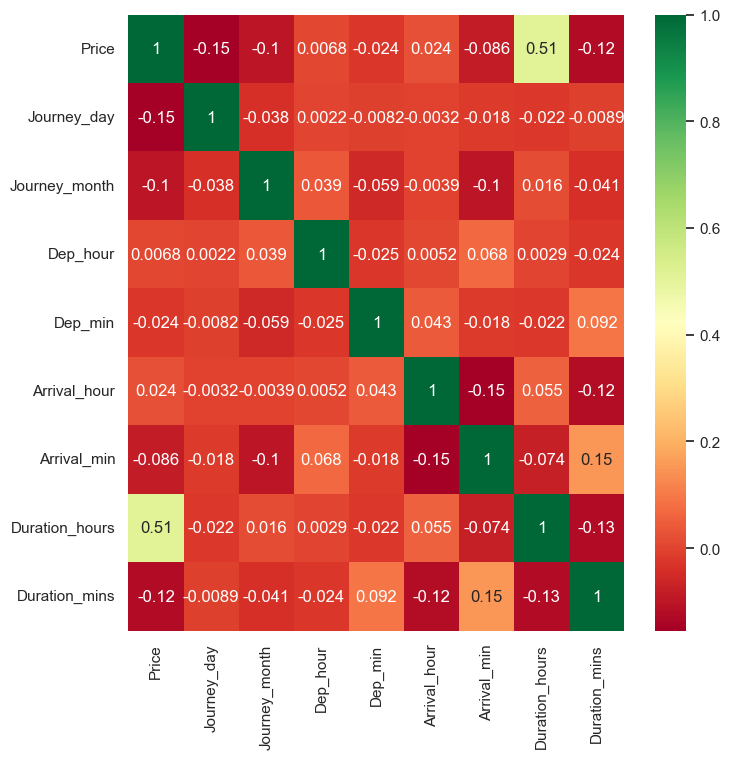

In [127]:
# Finds correlation between Independent and dependent attributes

plt.figure(figsize = (8,8))
sns.heatmap(data.corr(), annot = True, cmap = "RdYlGn")

plt.show()

In [131]:
data_train.columns

Index(['Total_Stops', 'Price', 'Journey_day', 'Journey_month', 'Dep_hour',
       'Dep_min', 'Arrival_hour', 'Arrival_min', 'Duration_hours',
       'Duration_mins', 'Airline_Air India', 'Airline_GoAir', 'Airline_IndiGo',
       'Airline_Jet Airways', 'Airline_Jet Airways Business',
       'Airline_Multiple carriers',
       'Airline_Multiple carriers Premium economy', 'Airline_SpiceJet',
       'Airline_Trujet', 'Airline_Vistara', 'Airline_Vistara Premium economy',
       'Source_Chennai', 'Source_Delhi', 'Source_Kolkata', 'Source_Mumbai',
       'Destination_Cochin', 'Destination_Delhi', 'Destination_Hyderabad',
       'Destination_Kolkata', 'Destination_New Delhi'],
      dtype='object')

In [135]:
#seprating independent and dependant columns
X = data_train.loc[:, ['Total_Stops', 'Journey_day', 'Journey_month', 'Dep_hour',
       'Dep_min', 'Arrival_hour', 'Arrival_min', 'Duration_hours',
       'Duration_mins', 'Airline_Air India', 'Airline_GoAir', 'Airline_IndiGo',
       'Airline_Jet Airways', 'Airline_Jet Airways Business',
       'Airline_Multiple carriers',
       'Airline_Multiple carriers Premium economy', 'Airline_SpiceJet',
       'Airline_Trujet', 'Airline_Vistara', 'Airline_Vistara Premium economy',
       'Source_Chennai', 'Source_Delhi', 'Source_Kolkata', 'Source_Mumbai',
       'Destination_Cochin', 'Destination_Delhi', 'Destination_Hyderabad',
       'Destination_Kolkata', 'Destination_New Delhi']]
X.head()

,Total_Stops,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hours,Duration_mins,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,0,24,3,22,20,1,10,2,50,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,2,1,5,5,50,13,15,7,25,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2,2,9,6,9,25,4,25,19,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0
3,1,12,5,18,5,23,30,5,25,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
4,1,1,3,16,50,21,35,4,45,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [133]:
y = data_train.iloc[:, 1]
y.head()

0     3897
1     7662
2    13882
3     6218
4    13302
Name: Price, dtype: int64

In [136]:
# Important feature using ExtraTreesRegressor

from sklearn.ensemble import ExtraTreesRegressor
selection = ExtraTreesRegressor()
selection.fit(X, y)

ExtraTreesRegressor()

In [137]:
print(selection.feature_importances_)

[2.51287864e-01 1.44053687e-01 5.33785435e-02 2.43734649e-02
 2.10022705e-02 2.82504548e-02 1.89907919e-02 1.07972400e-01
 1.73021617e-02 8.79990067e-03 1.96679342e-03 1.92994098e-02
 1.34808828e-01 6.66110077e-02 1.93320253e-02 8.36007644e-04
 2.62551990e-03 1.18953361e-04 4.83036014e-03 8.15054677e-05
 4.03985762e-04 1.11194852e-02 3.19735568e-03 7.18644923e-03
 8.37515259e-03 1.23356832e-02 6.27441919e-03 4.65598395e-04
 2.47199214e-02]


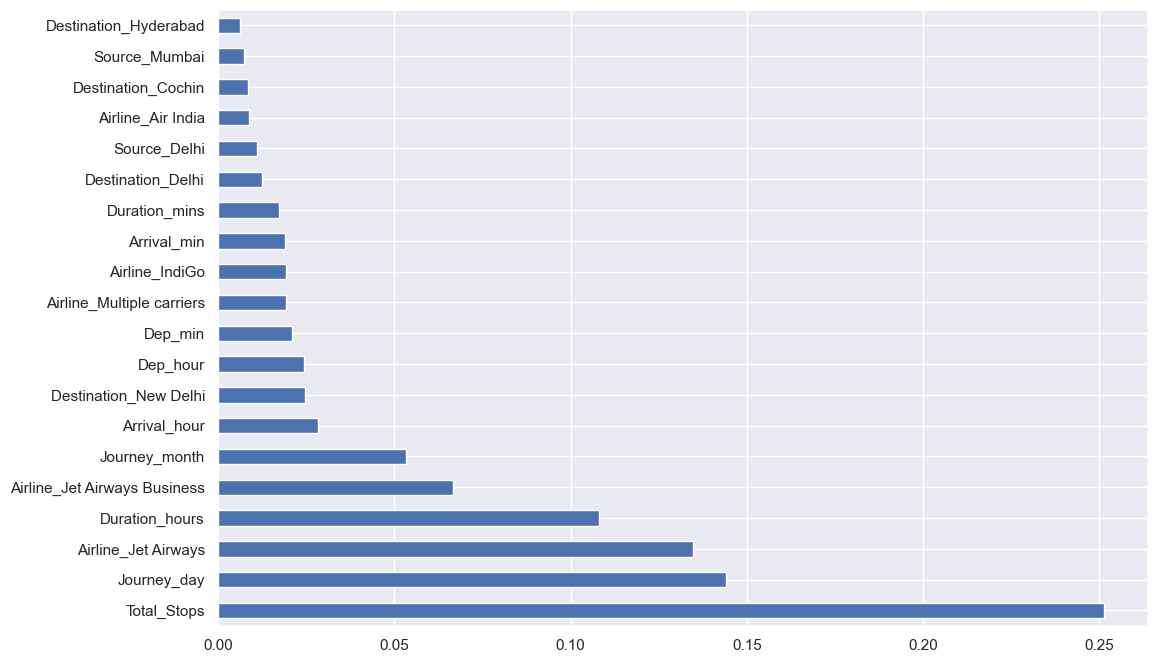

In [138]:
#plot graph of feature importances for better visualization

plt.figure(figsize = (12,8))
feat_importances = pd.Series(selection.feature_importances_, index=X.columns)
feat_importances.nlargest(20).plot(kind='barh')
plt.show()

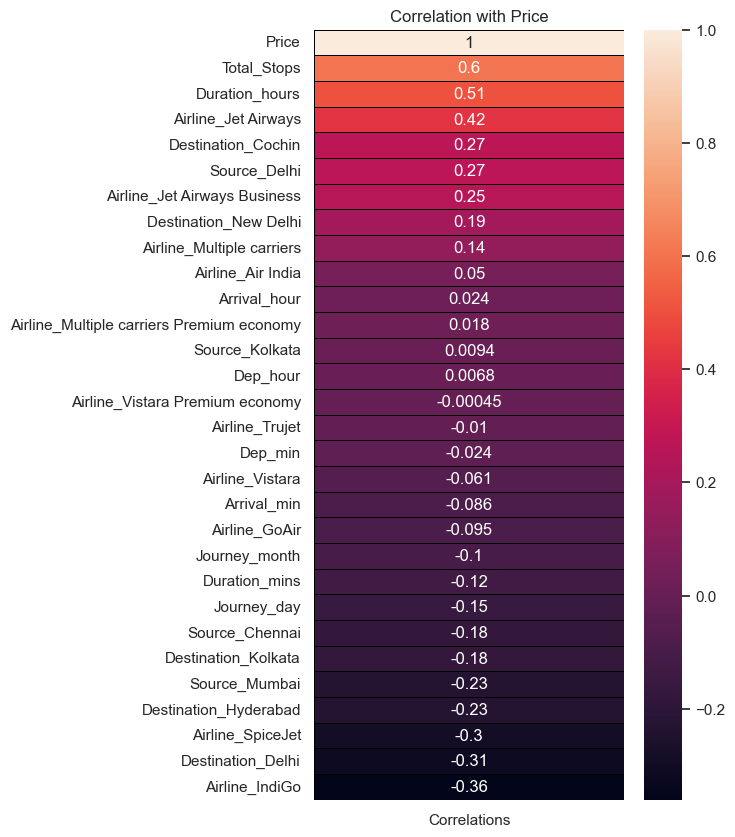

In [139]:
corr = data_train.corrwith(data_train
                           ['Price']).sort_values(ascending = False).to_frame()
corr.columns = ['Correlations']
plt.subplots(figsize = (5,10))
sns.heatmap(corr,annot = True,linewidths = 0.4,linecolor = 'black');
plt.title('Correlation with Price');

### Scaling the data

from sklearn.preprocessing import StandardScaler

# Assuming 'data_train' is your dataset
# Initialize the StandardScaler
scaler = StandardScaler()

# Fit the scaler to your data and transform it
data_train_scaled = scaler.fit_transform(data_train)

## Model Creation

### Train test split

In [168]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

## Fitting model using Random Forest

1. Split dataset into train and test set in order to prediction w.r.t X_test
2. If needed do scaling of data
 - Scaling is not done in Random forest
4. Import model
5. Fit the data
6. Predict w.r.t X_test
7. In regression check RSME Score
8. Plot graph

### RandomForestRegressor

In [163]:
from sklearn.ensemble import RandomForestRegressor
reg_rf = RandomForestRegressor()
reg_rf.fit(X_train, y_train)

RandomForestRegressor()

In [164]:
y_pred = reg_rf.predict(X_test)

In [165]:
reg_rf.score(X_train, y_train)

0.9532852250065251

In [166]:
reg_rf.score(X_test, y_test)

0.7959823058946974

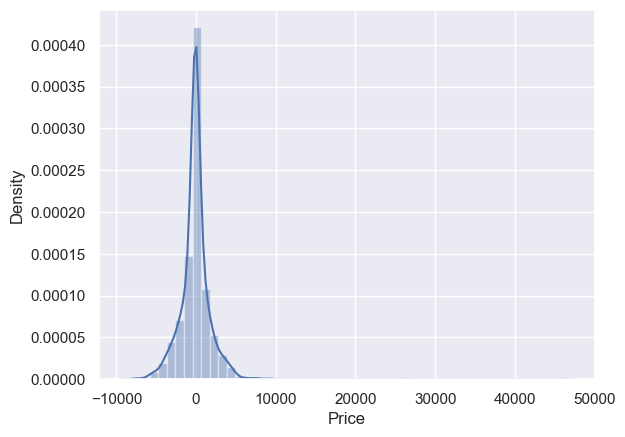

In [173]:
sns.distplot(y_test-y_pred)
plt.show()

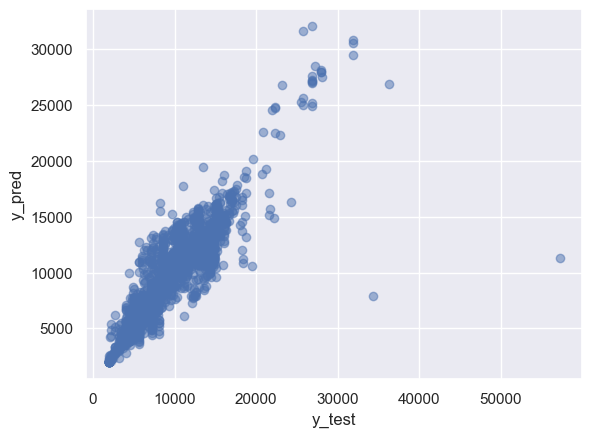

In [174]:
plt.scatter(y_test, y_pred, alpha = 0.5)
plt.xlabel("y_test")
plt.ylabel("y_pred")
plt.show()

In [175]:
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))
print('MSE:', metrics.mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

MAE: 1179.0802225481975
MSE: 4399041.011424144
RMSE: 2097.389093950892


In [176]:
# RMSE/(max(DV)-min(DV))

2090.5509/(max(y)-min(y))

0.026887077025966846

In [177]:
metrics.r2_score(y_test, y_pred)

0.7959823058946974

# Hyperparameter Tuning
- Choose following method for hyperparameter tuning
    1. RandomizedSearchCV --> Fast
    2. GridSearchCV
- Assign hyperparameters in form of dictionery
- Fit the model
- Check best paramters and best score

In [179]:
from sklearn.model_selection import RandomizedSearchCV


In [180]:
#Randomized Search CV

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1200, num = 12)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(5, 30, num = 6)]
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10, 15, 100]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 5, 10]

In [181]:
# Create the random grid

random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}

In [182]:
# Random search of parameters, using 5 fold cross validation, 
# search across 100 different combinations
rf_random = RandomizedSearchCV(estimator = reg_rf, param_distributions = random_grid,scoring='neg_mean_squared_error',
                               n_iter = 10, cv = 5, verbose=2, random_state=42, n_jobs = 1)


In [183]:
rf_random.fit(X_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   5.1s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   4.8s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   3.6s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   3.1s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   2.9s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1100; total time=   4.8s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1100; total time=   4.5s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimator

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=1,
                   param_distributions={'max_depth': [5, 10, 15, 20, 25, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000, 1100,
                                                         1200]},
                   random_state=42, scoring='neg_mean_squared_error',
                   verbose=2)

In [184]:
rf_random.best_params_


{'n_estimators': 700,
 'min_samples_split': 15,
 'min_samples_leaf': 1,
 'max_features': 'auto',
 'max_depth': 20}

In [185]:
prediction = rf_random.predict(X_test)

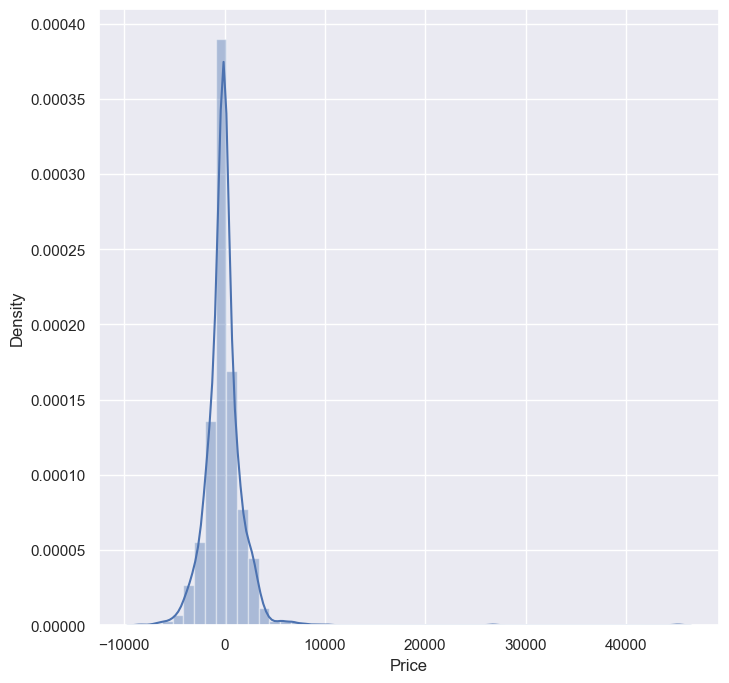

In [186]:
plt.figure(figsize = (8,8))
sns.distplot(y_test-prediction)
plt.show()

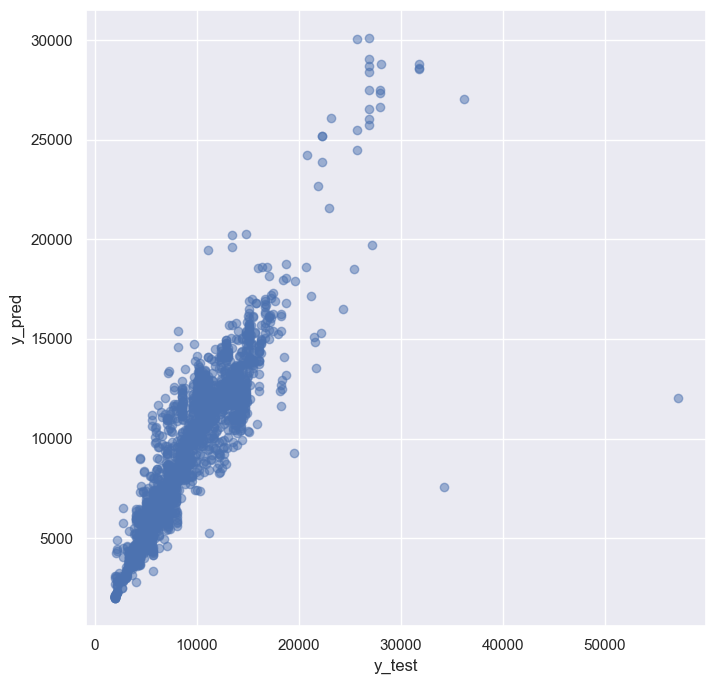

In [187]:
plt.figure(figsize = (8,8))
plt.scatter(y_test, prediction, alpha = 0.5)
plt.xlabel("y_test")
plt.ylabel("y_pred")
plt.show()

In [188]:
print('MAE:', metrics.mean_absolute_error(y_test, prediction))
print('MSE:', metrics.mean_squared_error(y_test, prediction))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, prediction)))

MAE: 1163.5581423746323
MSE: 4043805.9952891683
RMSE: 2010.9216780593838


In [191]:
## Save the model to reuse it again
import pickle
# open a file, where you ant to store the data
file = open('flight_rf.pkl', 'wb')

# dump information to that file
pickle.dump(rf_random, file)

In [192]:
model = open('flight_rf.pkl','rb')
forest = pickle.load(model)

In [193]:
y_prediction = forest.predict(X_test)

In [194]:
metrics.r2_score(y_test, y_prediction)

0.8124573123038454

# Challenges Faced

In the process of building and evaluating the regression models, we encountered several challenges:

1. **Overfitting:** Both Linear Regression and Lasso Regression models achieved nearly perfect accuracy on the training and test datasets, which could be a sign of overfitting. To address this, we applied cross-validation to Random Forest Regressor and performed hyperparameter tuning.

2. **Data Preprocessing:** It is crucial to ensure that the data is appropriately preprocessed, including handling missing values, scaling features, and encoding categorical variables. Without proper preprocessing, the models may not perform optimally.

3. **Hyperparameter Tuning:** Finding the optimal hyperparameters for the Random Forest Regressor required an extensive search over a grid of hyperparameters. This process can be computationally intensive.

4. **Evaluation Metrics:** Choosing the right evaluation metrics is essential. In this report, we used R-squared, MAE, MSE, RMSE, and adjusted R-squared to assess model performance. Selecting the most relevant metrics for your specific problem is crucial.

5. **Data Quality:** The quality of the data, including the accuracy of flight fare information and the relevance of features, can significantly impact model performance. Ensuring high-quality data is essential for reliable predictions.

Overall, while we faced challenges in model evaluation and selection, the Random Forest Regressor, after hyperparameter tuning, emerged as the most promising model for predicting flight fares. Further refinement and validation on real-world data are recommended before deploying it in a production environment.


---

# Flight Fare Prediction Project Conclusion Report

## Project Overview

The Flight Fare Prediction project aimed to develop a predictive model to estimate flight fares accurately. In this report, we summarize the project's key findings, model selection, and recommendations.

## Data Analysis

### Domain Analysis

The dataset contains essential information about flight journeys, including various features such as airline, date of journey, source, destination, route, departure time, arrival time, duration, total stops, additional information, and price. Our domain analysis helped us understand the characteristics of the data.

### Univariate Analysis

We conducted univariate analysis to explore individual features:
- We observed preferences for airlines, with Jet Airways being the most favored.
- May and June were the most popular months for travel.
- Delhi was the primary departure point, while Chennai had the lowest departures.
- Cochin was the preferred destination.
- The route from Delhi to Bombay to Cochin (DEL-BOM-COK) was the top choice.
- Departure time had a limited impact on pricing.
- Passengers preferred shorter flight durations and non-stop flights.
- Most flight prices fell below 20,000 units of currency.

### Bivariate Analysis

We conducted bivariate analysis to understand relationships between features and flight fares:
- Jet Airways Business had the highest peak prices, while Trujet maintained fixed pricing.
- Travel in March 2019 was associated with higher prices.
- Bangalore and Delhi had higher-priced flights, while Chennai offered lower fares.
- Flights departing from New Delhi had the highest prices.
- Certain routes, such as BLR-BOM-DEL, had higher prices.
- Price variations by departure time were observed.
- Non-stop flights generally had lower prices.
- We analyzed the relationships between airlines and source, destination, total stops, and additional information.

## Model Comparison

We compared three regression models: Linear Regression, Lasso Regression, and Random Forest Regressor. Here are the key findings:

- Linear Regression and Lasso Regression achieved near-perfect accuracy on both training and test datasets, suggesting potential overfitting.
- Random Forest Regressor, after hyperparameter tuning, demonstrated strong performance with high R-squared scores, low error metrics, and consistent cross-validation results.

## Conclusion

Based on our analysis and model comparison, we recommend the **Random Forest Regressor** for production use. It exhibits robust predictive power, generalizes well to unseen data, and benefits from hyperparameter tuning. However, we advise further refinement and validation on real-world data before deployment.

This project provides valuable insights into flight fare preferences and pricing factors, enabling data-driven decisions for both passengers and airlines.
